# AI in Healthcare - A I 395T High-risk Project

## Comparative Analysis of CNN and Vision Language Models for Explainable Medical Image Classification

### A Case Study on Brain Tumor MRI

#### Install PyTorch

In [2]:
!pip install torch torchvision

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.2.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 MB 19.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 20.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 31.5 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 18.2 MB/s eta 

#### Install necessary libraries

In [3]:
!pip install scikit-learn tensorboard opencv-python matplotlib seaborn pandas kaggle grad_cam

  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached kaggle-1.7.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached grad_cam-1.5.5-py3-none-any.whl
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached grpc

#### Download dataset

In [4]:
!python3 download_dataset.py

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
Dataset downloaded to: ./brain-tumor-mri-dataset


#### Run Training 

In [5]:
!python3 run_training.py

Random seed set to 42
/home/ahmed/Downloads/High-Risk_Project/Delivery/AIHC_High-Risk_Project_Code/.venv/lib/python3.12/site-packages/torch/__init__.py:1240: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
Using device: cuda
Training samples: 5712
Validation samples: 656
Testing samples: 655

Class distribution:
Training: {0: 1595, 1: 1321, 2: 1339, 3: 1457}
Validation: {0: 192, 1: 151, 2: 164, 3: 149}
Testing: {0: 213, 1: 149, 2: 142, 3: 151}
Model architecture logged to TensorBoard

==================== Training Started ====================
Run name: brain_tumor_cnn_20250428_194642
Number of epochs: 30
Batch size: 32
Learning rate: 0.0007

Epoch [1/30] - Time: 9.25s
Train Loss: 1.0167, Train Acc: 54.59%
Val Loss: 0.7503, Val Acc: 66.62%
---------------------------

#### Generate a report of misclassified images

In [6]:
!python3 generate-misclassification-report.py --checkpoint_path checkpoints/brain_tumor_cnn_20250428_194642/best_model_epoch_26.pth

Using device: cuda
Training samples: 5712
Validation samples: 656
Testing samples: 655

Class distribution:
Training: {0: 1595, 1: 1321, 2: 1339, 3: 1457}
Validation: {0: 192, 1: 151, 2: 164, 3: 149}
Testing: {0: 213, 1: 149, 2: 142, 3: 151}
Loaded model from checkpoint: checkpoints/brain_tumor_cnn_20250428_194642/best_model_epoch_26.pth
Model was trained for 26 epochs
Validation loss: 0.0488, Validation accuracy: 98.48%
Misclassification report saved to misclassified_images.csv
Total misclassified images: 7

Misclassification statistics by class:
  notumor: 1 misclassified as:
    - meningioma: 1 (100.0%)
  glioma: 2 misclassified as:
    - meningioma: 2 (100.0%)
  meningioma: 4 misclassified as:
    - notumor: 2 (50.0%)
    - glioma: 2 (50.0%)


#### View misclassified images list

In [22]:
import pandas as pd
pd.set_option('max_colwidth', 800)
df = pd.read_csv('misclassified_images.csv')
df

,file_path,true_class,predicted_class
0,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0057.jpg,meningioma,notumor
1,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0060.jpg,meningioma,glioma
2,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0066.jpg,meningioma,glioma
3,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0083.jpg,meningioma,notumor
4,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0232.jpg,glioma,meningioma
5,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0271.jpg,glioma,meningioma
6,brain-tumor-mri-dataset/Testing/notumor/Te-no_0350.jpg,notumor,meningioma


#### Run explainability methods on misclassified images

In [3]:
!python3 run_explainability.py --checkpoint_path checkpoints/brain_tumor_cnn_20250428_194642/best_model_epoch_26.pth --misclassified_csv misclassified_images.csv

Using device: cuda
Loaded model from checkpoint: checkpoints/brain_tumor_cnn_20250428_194642/best_model_epoch_26.pth
Model was trained for 26 epochs
Validation loss: 0.0488, Validation accuracy: 98.48%
Loaded 7 misclassified images from misclassified_images.csv

Applying gradcam++ explainability method...
Applying gradcam++ to 7 misclassified images...
Visualization saved to explainability_results/gradcam++/Te-me_0057_meningioma_as_notumor.png
Visualization saved to explainability_results/gradcam++/Te-me_0060_meningioma_as_glioma.png
Visualization saved to explainability_results/gradcam++/Te-me_0066_meningioma_as_glioma.png
Visualization saved to explainability_results/gradcam++/Te-me_0083_meningioma_as_notumor.png
Visualization saved to explainability_results/gradcam++/Te-gl_0232_glioma_as_meningioma.png
Visualization saved to explainability_results/gradcam++/Te-gl_0271_glioma_as_meningioma.png
Visualization saved to explainability_results/gradcam++/Te-no_0350_notumor_as_meningioma.pn

#### Display explainability visulaizations

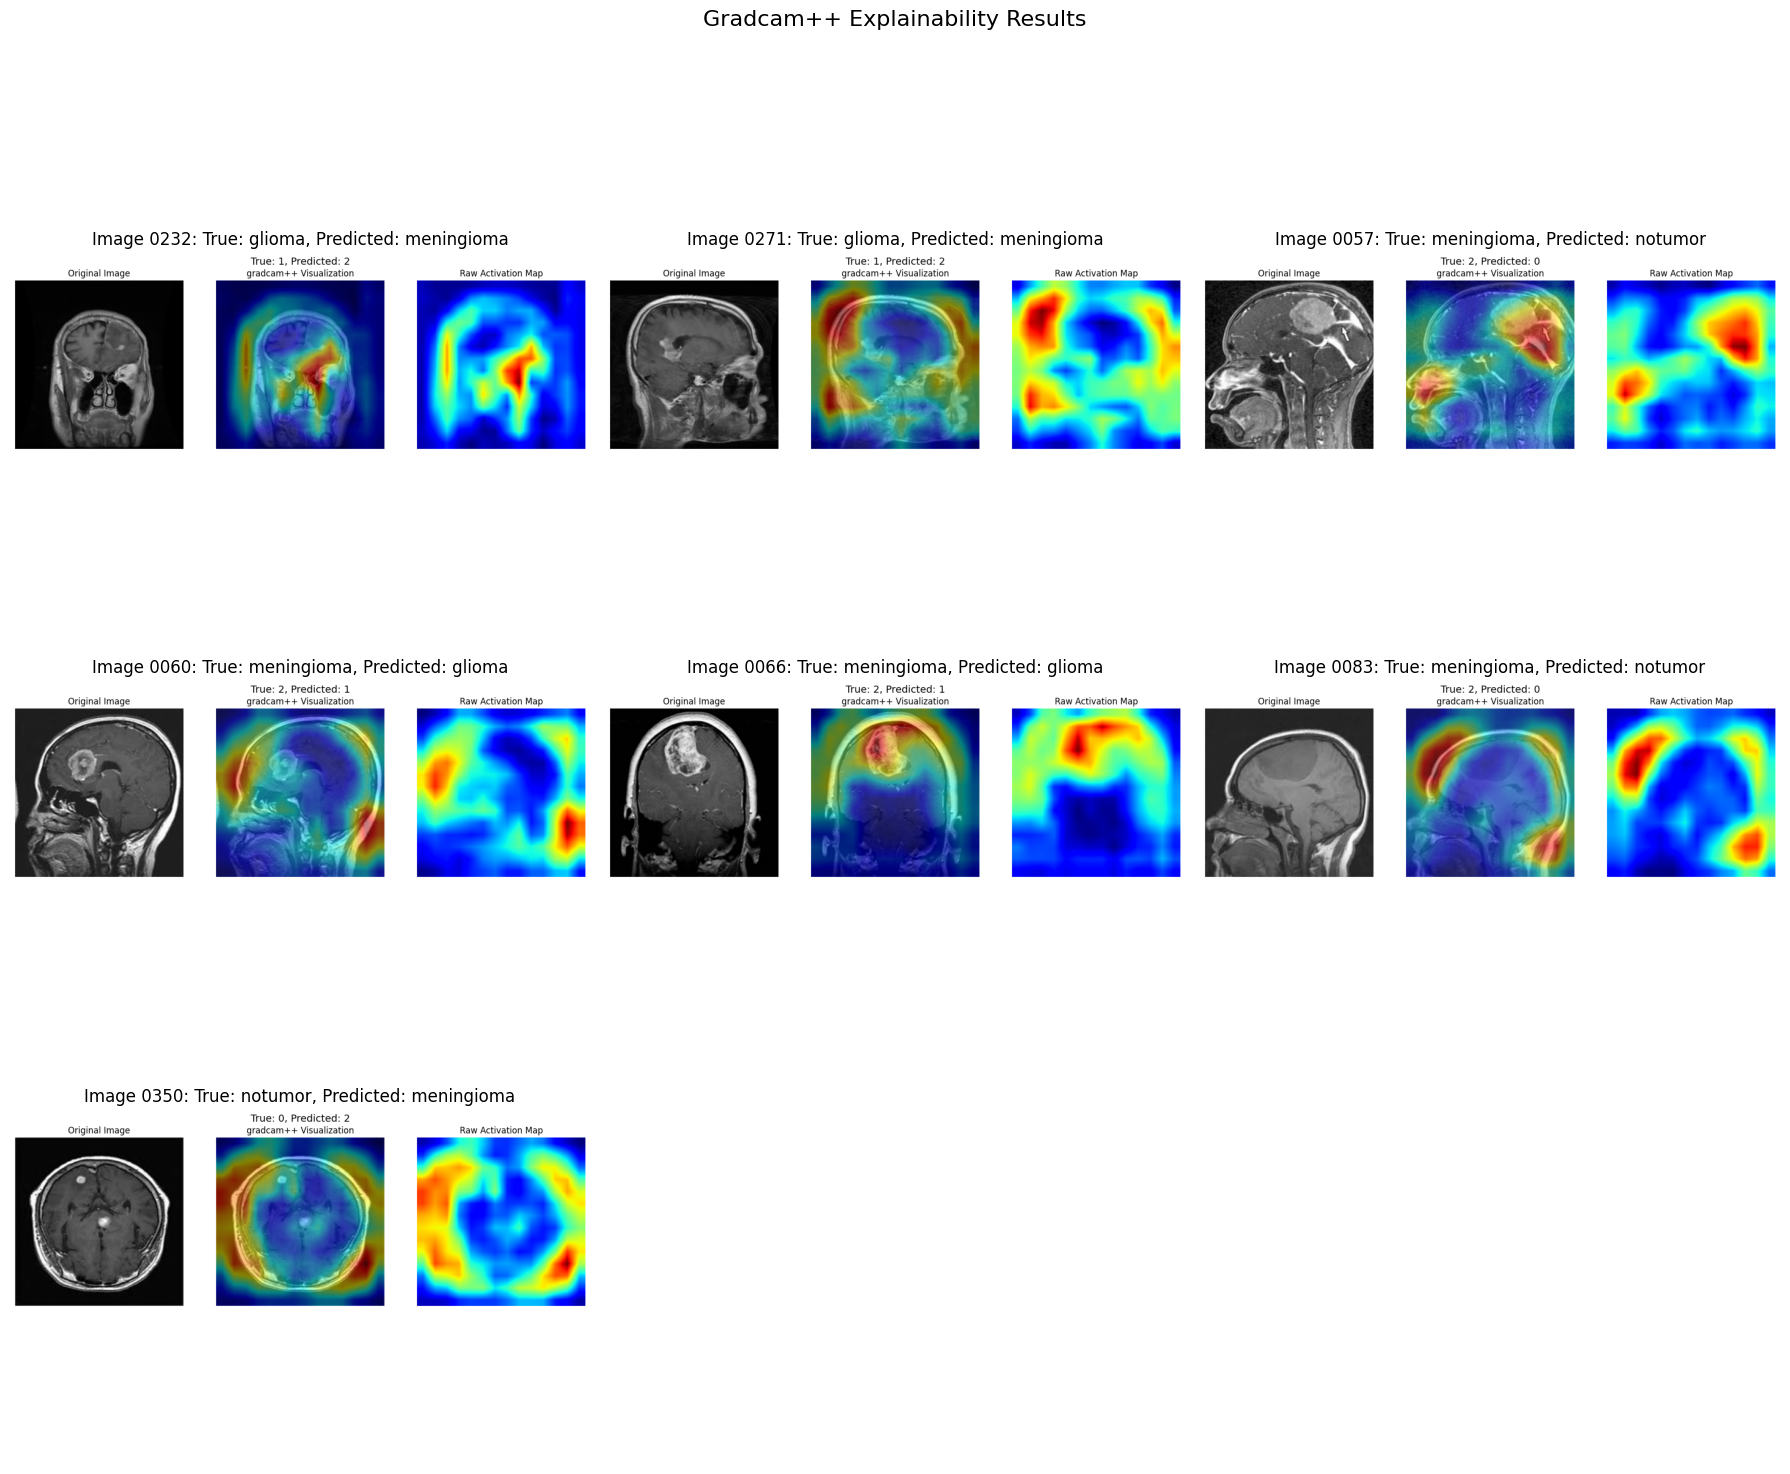

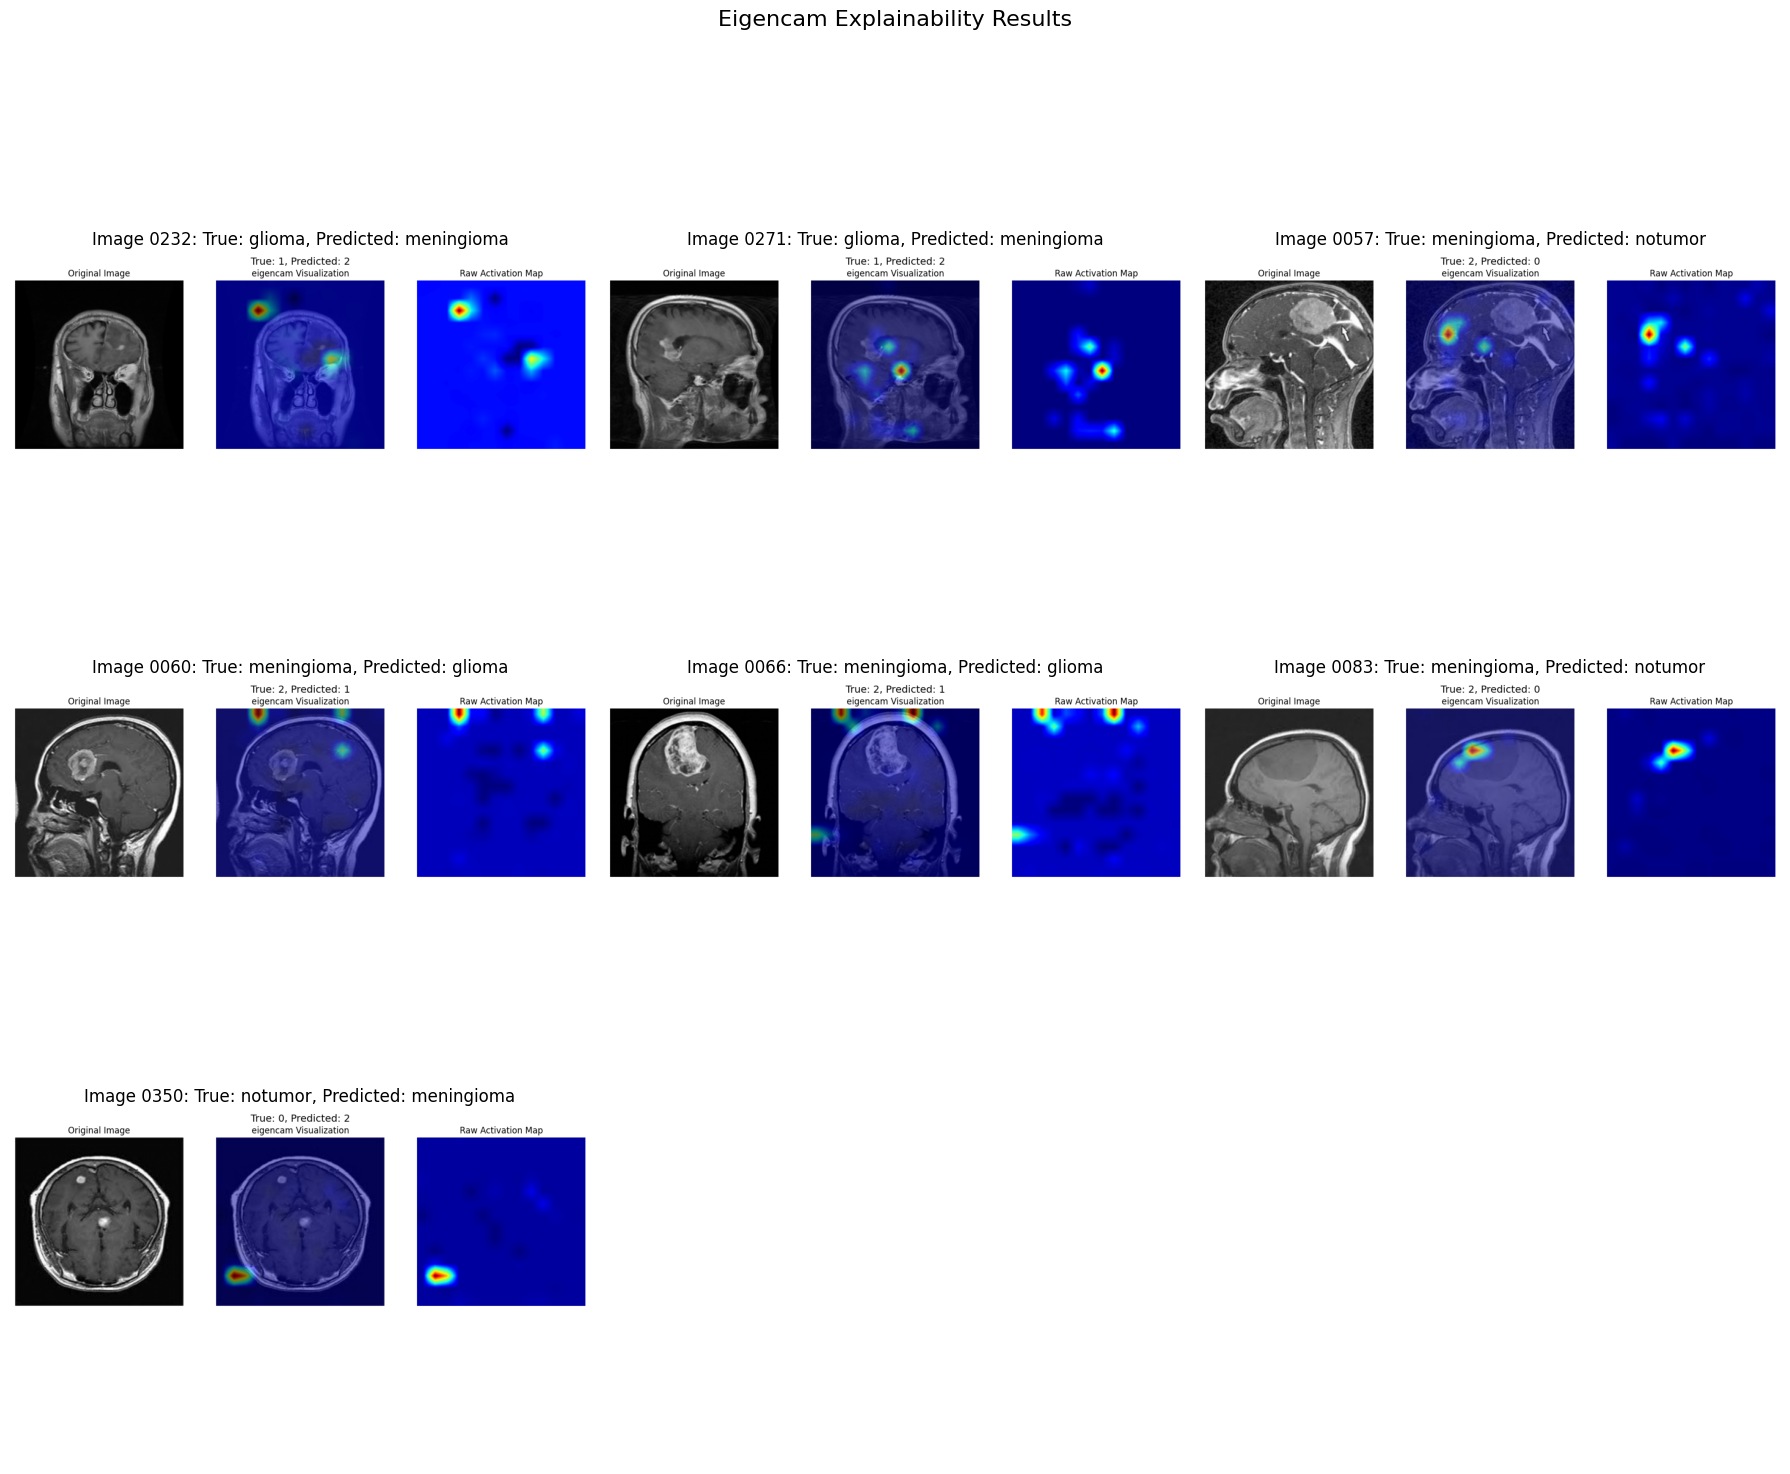

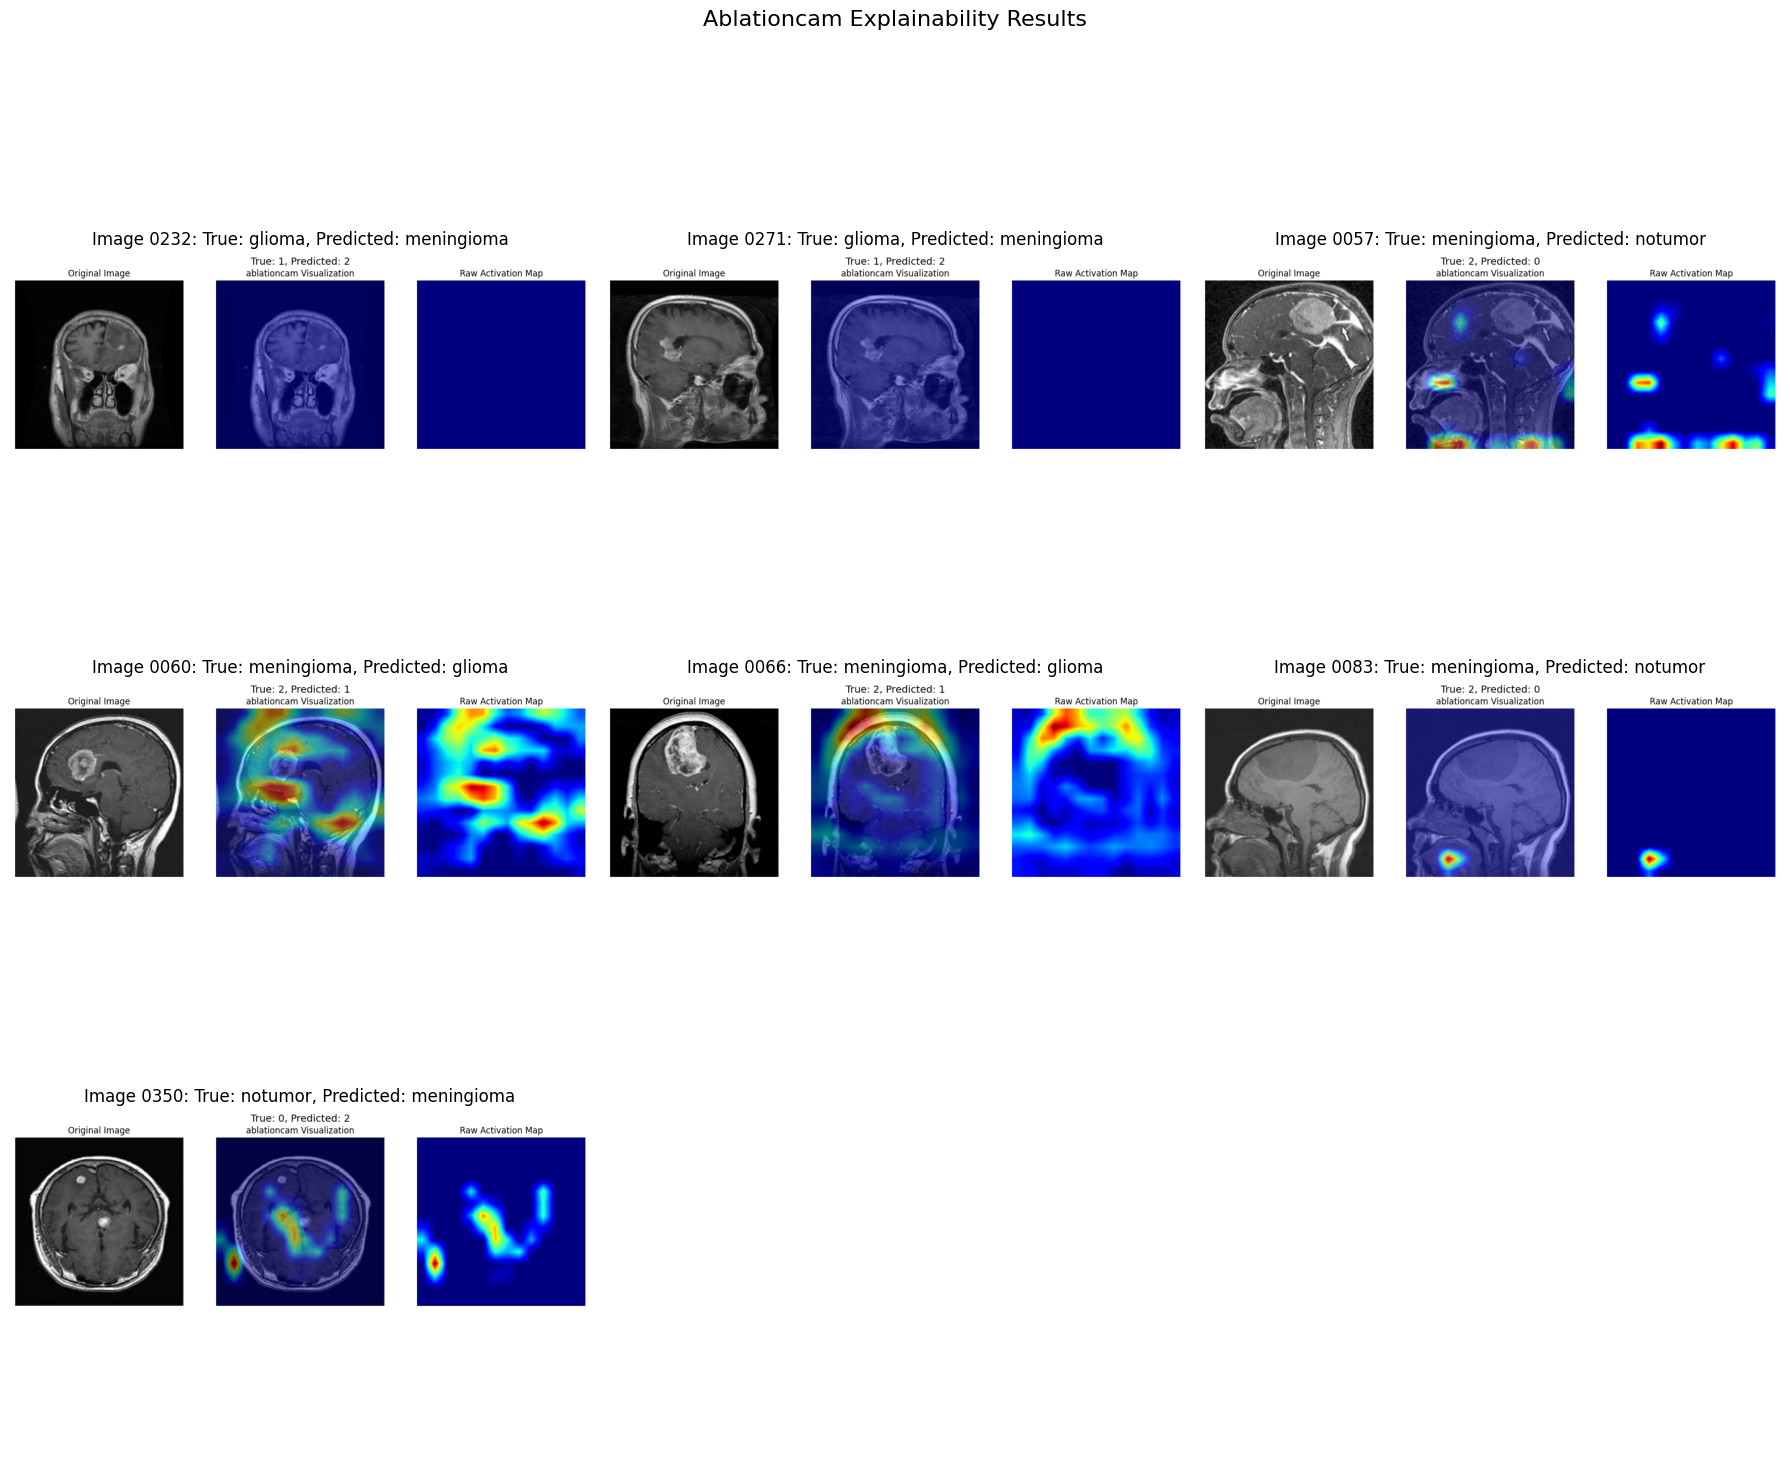

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import re
from IPython.display import display, HTML

# Define the methods and get their folders
methods = ['gradcam++', 'eigencam', 'ablationcam']
base_path = 'explainability_results/'

# Function to extract information from filename
def get_caption_info(filename):
    # Pattern: Te-{class}_{id}_{true_class}_as_{predicted_class}.png
    pattern = r'Te-(\w+)_(\d+)_(\w+)_as_(\w+)\.png'
    match = re.match(pattern, os.path.basename(filename))
    
    if match:
        prefix, img_id, true_class, pred_class = match.groups()
        return f"Image {img_id}: True: {true_class}, Predicted: {pred_class}"
    return os.path.basename(filename)

# Create a figure for each method
for method in methods:
    method_path = os.path.join(base_path, method)
    image_files = [f for f in os.listdir(method_path) if f.endswith('.png')]
    
    if not image_files:
        print(f"No images found for {method}")
        continue
    
    # Display method header
    display(HTML(f"<h2>{method.capitalize()} Visualization Results</h2>"))
    
    # Create a grid of subplots (adjust rows/cols based on image count)
    n_images = len(image_files)
    cols = 3  # Adjust this based on your preference
    rows = (n_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
    fig.suptitle(f"{method.capitalize()} Explainability Results", fontsize=16)
    
    # Make axes iterable for single row cases
    if rows == 1:
        axes = [axes]
    if rows == 1 and cols == 1:
        axes = [[axes]]
    
    # Plot each image
    for i, img_file in enumerate(sorted(image_files)):
        row, col = i // cols, i % cols
        ax = axes[row][col] if rows > 1 else axes[col]
        
        img_path = os.path.join(method_path, img_file)
        img = mpimg.imread(img_path)
        
        ax.imshow(img)
        ax.set_title(get_caption_info(img_file))
        ax.axis('off')
    
    # Hide empty subplots
    for i in range(n_images, rows * cols):
        row, col = i // cols, i % cols
        ax = axes[row][col] if rows > 1 else axes[col]
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

#### In-Context Learning using LlaVA-Med

In [6]:
!python3 in-context-learning.py


=== Processing: brain-tumor-mri-dataset/Testing/meningioma/Te-me_0057.jpg ===
Sending request to Ollama...

=== Classification Result ===
File: brain-tumor-mri-dataset/Testing/meningioma/Te-me_0057.jpg
Diagnosis: Glioma

=== Model's Full Response ===
 In this brain MRI scan, I observe an oval-shaped, well-circumscribed mass with a broad dural base in the right parasagittal region. The mass appears to be extra-axial, as it is displacing the adjacent brain tissue without invading it. There is no midline shift, and the ventricle size seems normal. The gray-white matter differentiation is symmetric, and there are no abnormal enhancements or edema visible in the surrounding tissue.

Based on these findings, my diagnosis for this image is Meningioma. I am confident in this diagnosis because the mass's location, shape, and enhancement pattern are consistent with meningiomas. Additionally, the absence of midline shift, normal ventricle size, and symmetric gray-white matter differentiation fur

In [21]:
import pandas as pd
pd.set_option('max_colwidth', 800)
df = pd.read_csv('mri_classification_results.csv')
df

,file_path,diagnosis,details
0,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0057.jpg,Glioma,"In this brain MRI scan, I observe an oval-shaped, well-circumscribed mass with a broad dural base in the right parasagittal region. The mass appears to be extra-axial, as it is displacing the adjacent brain tissue without invading it. There is no midline shift, and the ventricle size seems normal. The gray-white matter differentiation is symmetric, and there are no abnormal enhancements or edema visible in the surrounding tissue.\n\nBased on these findings, my diagnosis for this image is Meningioma. I am confident in this diagnosis because the mass's location, shape, and enhancement pattern are consistent with meningiomas. Additionally, the absence of midline shift, normal ventricle size, and symmetric gray-white matter differentiation further support the classification of No Tumor (n..."
1,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0060.jpg,Glioma,"Based on the provided brain MRI scan, here is my analysis and diagnosis:\n\nKey Features:\n- Oval-shaped mass with a multilobed appearance.\n- Centrally located in the suprasellar region, slightly superior to the pituitary fossa.\n- Homogeneous enhancement throughout the lesion.\n- Surrounding brain tissue appears normal without significant edema or midline shift.\n\nDiagnosis: Pituitary Tumor\n\nReasoning for the classification:\nThe presence of a multilobed, oval-shaped mass in the suprasellar region with homogeneous enhancement is highly suggestive of a pituitary tumor. The lesion is located in the expected position for a pituitary tumor, and its homogeneous enhancement pattern differs from the irregular borders and heterogeneous enhancement often seen in gliomas. Additionally, the..."
2,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0066.jpg,Glioma,"This is a Sagittal brain MRI scan showing an oval-shaped mass in the right parieto-occipital region. Key Features: Oval shape, homogeneous enhancement, no midline shift, no surrounding edema, and no effect on adjacent brain tissue or structures.\nDiagnosis: No Tumor (normal brain)\nConfidence Score: 9/10\nReasoning: The oval-shaped mass appears to be a benign lesion with homogeneous enhancement, which is not consistent with the irregular borders and heterogeneous enhancement typically seen in gliomas. Additionally, the absence of midline shift, surrounding edema, or effect on adjacent brain tissue or structures argues against a glioma or meningioma diagnosis. The pituitary tumor diagnosis is also unlikely, as the lesion is not located in the sellar/suprasellar region and does not caus..."
3,brain-tumor-mri-dataset/Testing/meningioma/Te-me_0083.jpg,No Tumor,"To provide an accurate diagnosis, I will carefully analyze the provided brain MRI scan. After thorough examination, considering the location, shape, enhancement pattern, and effect on surrounding tissue, my diagnosis is as follows:\n\nDiagnosis: No Tumor (normal brain)\n\nConfidence Score: 9/10\n\nReasoning for Classification:\nThe image shows normal brain anatomy with no abnormal enhancement or mass effect. The ventricle sizes appear to be within the normal range, and there is no midline shift or displacement of adjacent brain tissue. Additionally, there are no irregular masses, homogeneous extra-axial masses attached to the dura, or sellar/suprasellar region masses with homogeneous enhancement present in this scan. These visual features, along with the absence of any other indicativ..."
4,brain-tumor-mri-dataset/Testing/glioma/Te-gl_0232.jpg,Glioma,"I'm unable to directly view or analyze the provided MRI scan. However, I can help guide you through the process of making a diagnosis based on the information you have described.\n\nFor this particular scan, you mentioned that it shows a multilobular, contrast-enhancing mass in the right frontal and parietal regions with surrounding edema. The mass appears to be crossing midline and seems to involve both gray and white matter.\n\